In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2


In [46]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst = True)
df_comp.set_index('date',inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [47]:
df_comp['market_value'] = df_comp.ftse

In [48]:
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']
#del df_comp['spx']

size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [49]:
def LLR_test(mod1,mod2,DF=1):
   L1 = mod1.fit(start_ar_lags=11).llf
   L2 = mod2.fit(start_ar_lags=11).llf
   LR = (2*(L2-L1))
   p = chi2.sf(LR,DF).round(3)
   return p

In [50]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166


## ARIMA(1,1,1)

In [10]:
prc_mod_ar1_1_ma1 = ARIMA(df.market_value,order=(1,1,1))
res_prc_mod_ar1_1_ma1 = prc_mod_ar1_1_ma1.fit()
res_prc_mod_ar1_1_ma1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Wed, 16 Nov 2022   AIC                          55215.333
Time:                        05:45:45   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


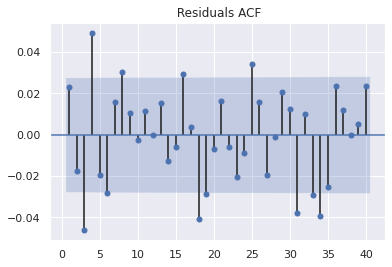

In [11]:
df['res_prc_mod_ar1_1_ma1'] = res_prc_mod_ar1_1_ma1.resid
sgt.plot_acf(df.res_prc_mod_ar1_1_ma1[1:],lags = 40,zero= False)
plt.title(' Residuals ACF')
plt.show()

## Higher Lag ARIMA Models

In [16]:
prc_mod_ar1_1_ma2 = ARIMA(df.market_value,order=(1,1,2))
res_prc_mod_ar1_1_ma2 = prc_mod_ar1_1_ma2.fit()

prc_mod_ar1_1_ma3 = ARIMA(df.market_value,order=(1,1,3))
res_prc_mod_ar1_1_ma3 = prc_mod_ar1_1_ma3.fit()

prc_mod_ar2_1_ma1 = ARIMA(df.market_value,order=(2,1,1))
res_prc_mod_ar2_1_ma1 = prc_mod_ar2_1_ma1.fit()

prc_mod_ar3_1_ma1 = ARIMA(df.market_value,order=(3,1,1))
res_prc_mod_ar3_1_ma1 = prc_mod_ar3_1_ma1.fit()

prc_mod_ar3_1_ma2 = ARIMA(df.market_value,order=(3,1,2))
res_prc_mod_ar3_1_ma2 = prc_mod_ar3_1_ma2.fit(start_ar_lags=5)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
print('\nARIMA(1,1,1) \tLL:',res_prc_mod_ar1_1_ma1.llf,'\tAIC:',res_prc_mod_ar1_1_ma1.aic)
print('\nARIMA(1,1,2) \tLL:',res_prc_mod_ar1_1_ma2.llf,'\tAIC:',res_prc_mod_ar1_1_ma2.aic)
print('\nARIMA(1,1,3) \tLL:',res_prc_mod_ar1_1_ma3.llf,'\tAIC:',res_prc_mod_ar1_1_ma3.aic)
print('\nARIMA(2,1,1) \tLL:',res_prc_mod_ar2_1_ma1.llf,'\tAIC:',res_prc_mod_ar2_1_ma1.aic)
print('\nARIMA(3,1,1) \tLL:',res_prc_mod_ar3_1_ma1.llf,'\tAIC:',res_prc_mod_ar3_1_ma1.aic)
print('\nARIMA(3,1,2) \tLL:',res_prc_mod_ar3_1_ma2.llf,'\tAIC:',res_prc_mod_ar3_1_ma2.aic)



ARIMA(1,1,1) 	LL: -27603.666412774845 	AIC: 55215.33282554969

ARIMA(1,1,2) 	LL: -27600.081863139967 	AIC: 55210.163726279934

ARIMA(1,1,3) 	LL: -27590.424032545823 	AIC: 55192.848065091646

ARIMA(2,1,1) 	LL: -27599.80748784872 	AIC: 55209.61497569744

ARIMA(3,1,1) 	LL: -27592.05537170885 	AIC: 55196.1107434177

ARIMA(3,1,2) 	LL: -27590.660808987082 	AIC: 55195.321617974165


In [21]:
print(LLR_test(prc_mod_ar1_1_ma2,prc_mod_ar1_1_ma3))
print(LLR_test(prc_mod_ar1_1_ma1,prc_mod_ar1_1_ma3,DF=2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0.0
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


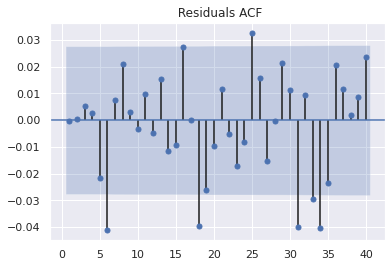

In [23]:
df['res_prc_mod_ar1_1_ma3'] = res_prc_mod_ar1_1_ma3.resid
sgt.plot_acf(df.res_prc_mod_ar1_1_ma3[1:],lags = 40,zero= False)
plt.title(' Residuals ACF')
plt.show()

In [24]:
prc_mod_ar5_1_ma1 = ARIMA(df.market_value,order=(5,1,1))
res_prc_mod_ar5_1_ma1 = prc_mod_ar5_1_ma1.fit(start_ar_lags=11)

prc_mod_ar6_1_ma3 = ARIMA(df.market_value,order=(6,1,3))
res_prc_mod_ar6_1_ma3 = prc_mod_ar6_1_ma3.fit(start_ar_lags=11)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [27]:
print('\nARIMA(1,1,3) \tLL:',res_prc_mod_ar1_1_ma3.llf,'\tAIC:',res_prc_mod_ar1_1_ma3.aic)
print('\nARIMA(5,1,1) \tLL:',res_prc_mod_ar5_1_ma1.llf,'\tAIC:',res_prc_mod_ar5_1_ma1.aic)
print('\nARIMA(6,1,3) \tLL:',res_prc_mod_ar6_1_ma3.llf,'\tAIC:',res_prc_mod_ar6_1_ma3.aic)



ARIMA(1,1,3) 	LL: -27590.424032545823 	AIC: 55192.848065091646

ARIMA(5,1,1) 	LL: -27586.51188812616 	AIC: 55189.02377625232

ARIMA(6,1,3) 	LL: -27583.565320399106 	AIC: 55189.13064079821


In [30]:
print(LLR_test(prc_mod_ar1_1_ma3,prc_mod_ar6_1_ma3,DF=5))
print(LLR_test(prc_mod_ar5_1_ma1,prc_mod_ar6_1_ma3,DF=3))

0.018
0.117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


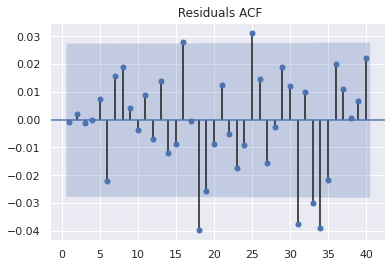

In [31]:
df['res_prc_mod_ar5_1_ma1'] = res_prc_mod_ar5_1_ma1.resid
sgt.plot_acf(df.res_prc_mod_ar5_1_ma1[1:],lags = 40,zero= False)
plt.title(' Residuals ACF')
plt.show()

In [32]:
res_prc_mod_ar5_1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Wed, 16 Nov 2022   AIC                          55189.024
Time:                        06:19:48   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5662      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.530      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4214      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0789           -1.8393j            1.8410           -0.2568
AR.5           -0.0789           +1.8393j            1.8410            0.2568
MA.1            2.3732           +0.0000j            2.3732            0.0000
-----------------------------------------------------------------------------
"""

## Models With Higher Levels Of Intergration

In [33]:
df['delta_prices'] = df.market_value.diff(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Checking Wether Our Delta Prices Holds Against 1 Level Of Integration For Prices Using ARIMA(1,1,1) Vs ARIMA(1,0,1) For Delta Prices.

In [35]:
prc_mod_ar1_0_ma1 = ARIMA(df.delta_prices[1:],order=(1,0,1))
res_prc_mod_ar1_0_ma1 = prc_mod_ar1_0_ma1.fit()
res_prc_mod_ar1_0_ma1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Wed, 16 Nov 2022   AIC                          55215.333
Time:                        06:44:00   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

**We have achieved stationarty with only one difference in our timeseries using Delta Prices which affirms that using more Integration levels than 1 is absolutely unnecessary since 1 difference was enough.**  

# ARIMAX

In [57]:
model_ar1_1_ma1_Xspx = ARIMA(df.market_value,order=(1,1,1),exog=df.spx)
result_mod_ar1_1_ma1_Xspx = model_ar1_1_ma1_Xspx.fit()
result_mod_ar1_1_ma1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Wed, 16 Nov 2022   AIC                          55217.112
Time:                        07:06:58   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5874      2.655     -0.221      0.825      -5.790       4.616
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7463      0.070     10.602      0.000       0.608       0.884
ma.L1.D.market_value    -0.7923      0.064    -12.305      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3400           +0.0000j            1.3400            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX

In [59]:
model_sarimax = SARIMAX(df.market_value,order=(1,0,1), seasonal_order =(2,0,1,5),exog=df.spx)
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.576
Date:                           Wed, 16 Nov 2022   AIC                          53439.152
Time:                                   07:18:26   BIC                          53484.802
Sample:                               01-07-1994   HQIC                         53455.148
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7045      0.034     78.637      0.000       2.637       2.772
ar.L1          0.9999      0.000   2671.878      0.000       0.999       1.001
ma.L1         -0.3108      0.009    -33.193      0.000      -0.329      -0.292
ar.S.L5        0.9653      0.011     88.069      0.000       0.944       0.987
ar.S.L10       0.0344      0.010      3.347      0.001       0.014       0.055
ma.S.L5       -0.9991      0.006   -153.774      0.000      -1.012      -0.986
sigma2      2441.2174     28.239     86.448      0.000    2385.870    2496.565
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):              4200.84
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""